### Torch Audio

이번 pytorch 1.2 버전과 함께 나온 torchaudio라이브러리의 튜토리얼 문서의 번역버전입니다.

In [12]:
import torch
import torchaudio
import matplotlib.pyplot as plt
# 파일디렉토리에 음성, 음악 파일을 넣어줍시다.
filename = "input/pop.wav"
# 데이터를 load하면 바로 torch 파일로 올라가게 됩니다.
waveform, sample_rate = torchaudio.load(filename)
waveform, waveform.size()

(tensor([[-0.0762, -0.0574, -0.0203,  ...,  0.3599, -0.0361,  0.2102]]),
 torch.Size([1, 661504]))

시각화를 할때는 Shape을 고려해서 Transpose를 해야합니다. [1,661504] -> [661504,1] 로 바꾸어줍시다.

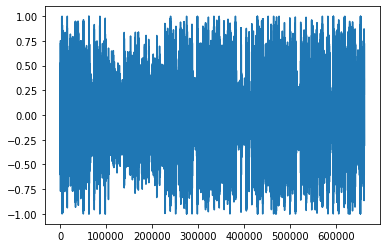

In [13]:
plt.figure()
plt.plot(waveform.t().numpy())

### Normalize

In [14]:
def normalize(tensor):
    # Subtract the mean, and scale to the interval [-1,1]
    tensor_minusmean = tensor - tensor.mean()
    return tensor_minusmean/tensor_minusmean.abs().max()

In [15]:
waveform = normalize(waveform)

In [16]:
waveform

tensor([[-0.0762, -0.0574, -0.0203,  ...,  0.3599, -0.0361,  0.2102]])

### 데이터 전처리

- Resample: 샘플링 레이트를 변경해서 다시 샘플링을 진행합니다.
- Spectrogram: STFT를 통해 Frequency영역대를 가지게 되는 Spectrogram을 만들어냅니다.
- MelScale: normal STFT을 Mel-frequency STFT로 튜닝합니다. Conversion matrix를 활용합니다.
- AmplitudeToDB: Spectrogram을 power/amplitude scale에서 decibel scale로 변경합니다.
- MFCC: Waveform에서 Mel-frequency cepstrum coefficients을 추출해 냅니다.
- MelSpectrogram: MEL Spectrograms울 STFT를 기반으로 만들어 냅니다.
- MuLawEncoding: mu-law companding 기반으로 Waveform을 인코딩합니다.
- MuLawDecoding: mu-law companding 기반으로 Waveform을 디코딩합니다.

In [17]:
function = torchaudio.transforms.Spectrogram()

In [18]:
specgram = torchaudio.transforms.Spectrogram()(waveform)
specgram[0][0]

tensor([ 18.0268,   0.8016,   5.5313,  ...,  78.8201, 221.1348, 560.2722])

In [19]:
melspecgram = torchaudio.transforms.MelSpectrogram()(waveform)
melspecgram

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [4.2857e-01, 3.9033e+00, 2.4807e-01,  ..., 5.4908e+00,
          2.7099e+01, 4.6406e+01],
         [2.3075e+00, 2.1016e+01, 1.3357e+00,  ..., 2.9564e+01,
          1.4591e+02, 2.4986e+02],
         ...,
         [9.0652e-01, 4.2713e-01, 6.2436e-01,  ..., 8.1188e+01,
          1.7948e+02, 8.9671e+01],
         [5.8029e-01, 4.4933e-01, 3.4214e-01,  ..., 9.4590e+01,
          1.5563e+02, 5.7165e+01],
         [1.2833e+00, 5.9669e-01, 4.9794e-01,  ..., 9.2971e+01,
          6.1467e+01, 9.0621e+01]]], grad_fn=<DifferentiableGraphBackward>)

In [20]:
melspecgram.shape

torch.Size([1, 128, 3308])